
# 1. Problem Statement
objective:
The goal of this project is to develop a robust churn prediction model that accurately identifies customers at risk of leaving the bank. Additionally, the model aims to uncover the underlying factors contributing to churn, enabling the bank to implement targeted strategies to improve customer satisfaction, enhance loyalty, and reduce attrition rates.

The model will predict whether a customer is likely to churn and provide a probability score for each prediction. It will also identify and rank the key factors contributing to churn, offering actionable insights and visualizations to help the bank address customer attrition effectively.

## 1.1. Importing libraries

In [120]:
import pandas as pd # for data manipulation
import numpy as np # for numerical computation
# for data analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split # for data splitting
from sklearn.preprocessing import StandardScaler # for data scaling
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for model evaluation
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
# explanability and interpretation
import shap
import xgboost as xgb
import lime
import lime.lime_tabular


## 1.2. Data preparation


1. data collection
2. data cleaning( i.e removing , imputing, or constanf values)


In [121]:
data =pd.read_csv('Churn_Modelling.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [122]:
data.duplicated().sum() # checking if we have duplicated values

0

In [123]:
data.isnull().sum() # check the empty cells
data.isna().sum()# check the na, nan values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [124]:
print(data['HasCrCard'].dtype)  # Check the data type


int64


# 2. Exploratory Data Analysis [EDA]

In [125]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [126]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [127]:
#data.sort_values(by="Age").head()
data.sort_values(by="Age", ascending=False).head()

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
6443       6444    15764927   Rogova          753    France    Male   92   
6759       6760    15660878    T'ien          705    France    Male   92   
2458       2459    15813303  Rearick          513     Spain    Male   88   
3033       3034    15578006      Yao          787    France  Female   85   
3387       3388    15798024     Lori          537   Germany    Male   84   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6443       3  121513.31              1          0               1   
6759       1  126076.24              2          1               1   
2458      10       0.00              2          1               1   
3033      10       0.00              2          1               1   
3387       8   92242.34              1          1               1   

      EstimatedSalary  Exited  
6443        195563.99       0  
6759         34436.83       0  
2458         52952.24       0  
3033        116537.96       0  
3387        186235.98       0

In [128]:
data1 = data[["CreditScore", 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']]
data2= data[['Geography','Gender']]



In [129]:
data1.corr()


CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

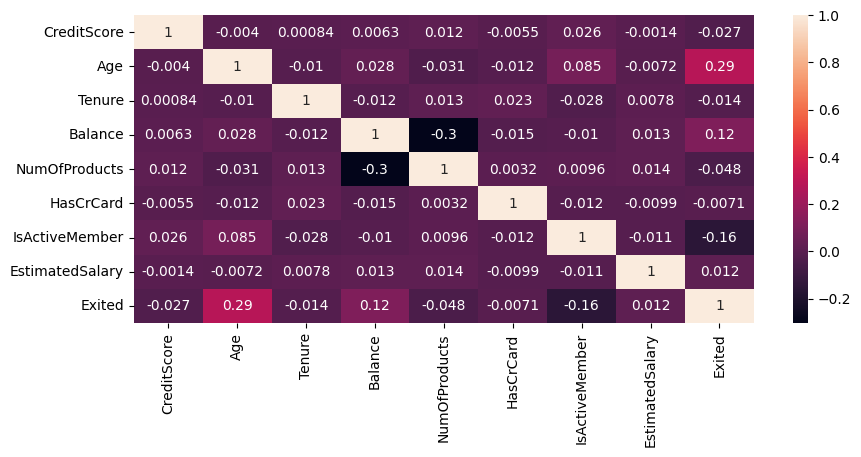

In [130]:
sns.heatmap(data1.corr(), annot=True)
plt.rcParams['figure.figsize']= (10,4)
plt.show()

In [131]:
data1.isnull().sum()
data1.fillna("")


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58       0  
2                  0        113931.57       1  
3                  0         93826.63       0  
4                  1         79084.10       0  
...              ...              ...     ...  
9995               0         96270.64       0  
9996               1        101699.77       0  
9997               1         42085.58       1  
9998               0         92888.52       1  
9999               0         38190.78       0  

[10000 rows x 9 columns]

In [132]:
# Count occurrences of the string 'na' in the entire DataFrame
na_count = (data1.applymap(lambda x: x == 'na')).sum().sum()
print(f"Number of occurrences of 'na': {na_count}")


Number of occurrences of 'na': 0


C:\Users\ntabi\AppData\Local\Temp\ipykernel_58616\2294014560.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [133]:

#data.groupby('Geography').mean(["CreditScore",'Age','Balance','TenureInMonths','Balance','IsActiveMember','HasCrCard','EstimatedSalary'])
#data.groupby('Geography').mean(data1)
#data1.groupby
data1.groupby(data['Geography']).mean()

CreditScore        Age    Tenure        Balance  NumOfProducts  \
Geography                                                                   
France      649.668329  38.511767  5.004587   62092.636516       1.530913   
Germany     651.453567  39.771622  5.009964  119730.116134       1.519729   
Spain       651.333872  38.890997  5.032297   61818.147763       1.539362   

           HasCrCard  IsActiveMember  EstimatedSalary    Exited  
Geography                                                        
France      0.706621        0.516753     99899.180814  0.161548  
Germany     0.713830        0.497409    101113.435102  0.324432  
Spain       0.694792        0.529673     99440.572281  0.166734

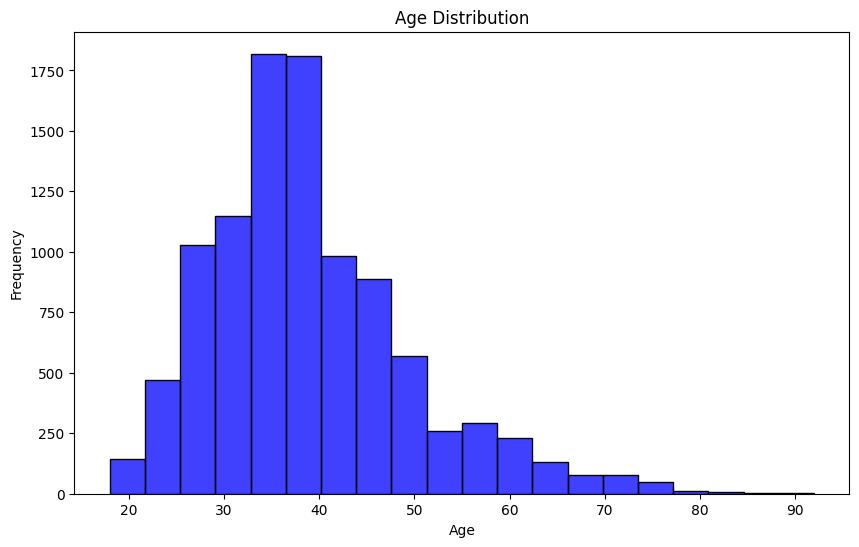

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\ntabi\AppData\Local\Temp\ipykernel_58616\406714009.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




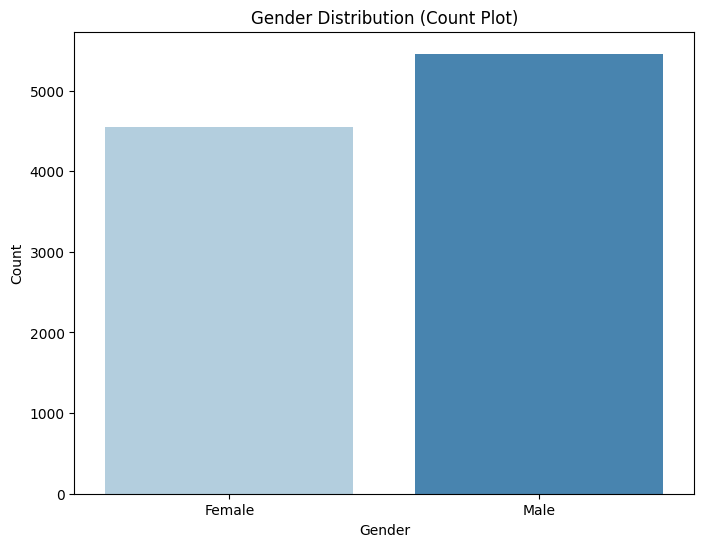

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Blues')
plt.title('Gender Distribution (Count Plot)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [136]:
fig = make_subplots(rows=2, cols=1)

plot1=go.Box(x=data['Age'],name='Age Box Plot',boxmean=True)
plot2=go.Histogram(x=data['Age'],name='Age Histogram')

fig.add_trace(plot1,row=1,col=1)
fig.add_trace(plot2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Ages")
fig.show()



In [137]:
fig = make_subplots(rows=2, cols=1)

plot1=go.Box(x=data['Tenure'],name='Months on book Box Plot',boxmean=True)
plot2=go.Histogram(x=data['Tenure'],name='Months on book Histogram')

fig.add_trace(plot1,row=1,col=1)
fig.add_trace(plot2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of months the customer is part of the bank")
fig.show()





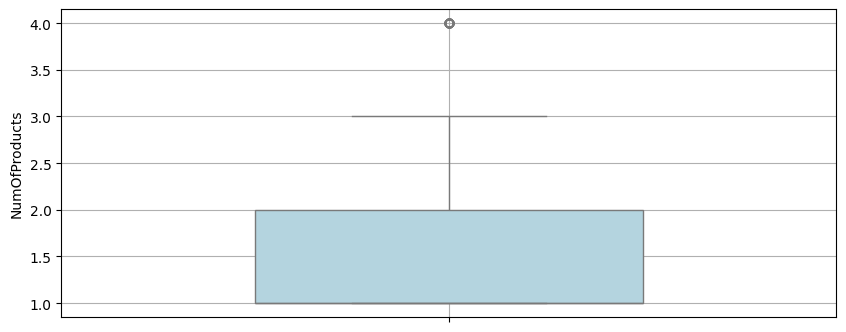

In [138]:
# using seabon
sns.boxplot(data=data['NumOfProducts'], color="lightblue", width=0.5)
plt.grid(True)


In [139]:
fig = make_subplots(rows=2, cols=1)

# Box plot for 'NumOfProducts'
plot1 = go.Box(x=data['NumOfProducts'], name='Total no. of products Box Plot', boxmean=True)

# Histogram for 'NumOfProducts'
plot2 = go.Histogram(x=data['NumOfProducts'], name='Total no. of products Histogram')

# Add the traces to the appropriate subplots
fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2, row=2, col=1)

# Update the layout of the figure
fig.update_layout(
    height=700, 
    width=1000, 
    title_text="Distribution of Total no. of products held by the customer"
)

# Display the plot
fig.show()




In [140]:
# ex.pie(dataname, name=column_name,title= of the pie, hole= size type)
ex.pie(data,names='IsActiveMember',title='Proportion of Active vs not Active',hole=0.33)


In [141]:
# ex.pie(dataname, name=column_name,title= of the pie, hole= size type)
ex.pie(data,names='Exited',title='Proportion customet Exited vs not Exited',hole=0.33)

In [142]:

fig = make_subplots(rows=2, cols = 1) # making a subplot with two rows

plot1=go.Box(x=data['CreditScore'], name='CreditScore Box Plot',boxmean=True)
plot2=go.Histogram(x=data['CreditScore'],name='CreditScore Histogram') # from credit columns and the title

fig.add_trace(plot1, row=1, col=1) 
fig.add_trace(plot2, row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Credit Score")
fig.show()



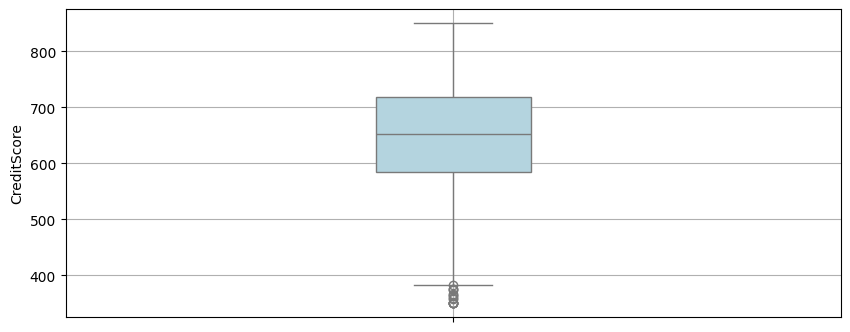

In [143]:
# using the seabon
sns.boxplot(data=data['CreditScore'], color="lightblue", width=0.2)
plt.grid(True)


In [144]:
fig = make_subplots(rows=2, cols=1)

plot1= go.Box(x=data['EstimatedSalary'], name='-EstimatedSalary Box plot', boxmean=True) # columns and title
plot2= go.Histogram(x=data['EstimatedSalary'], name ='EstimatedSalary Histogram plot')

fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2,row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Customer Estimated Salary") # height, lenghtg, tittle
fig.show()

# 3. Data preprocessing
- handling outliers
- scaling uisng  standardization
- one hot encoding : this involves converting the catagorical values into numerical values

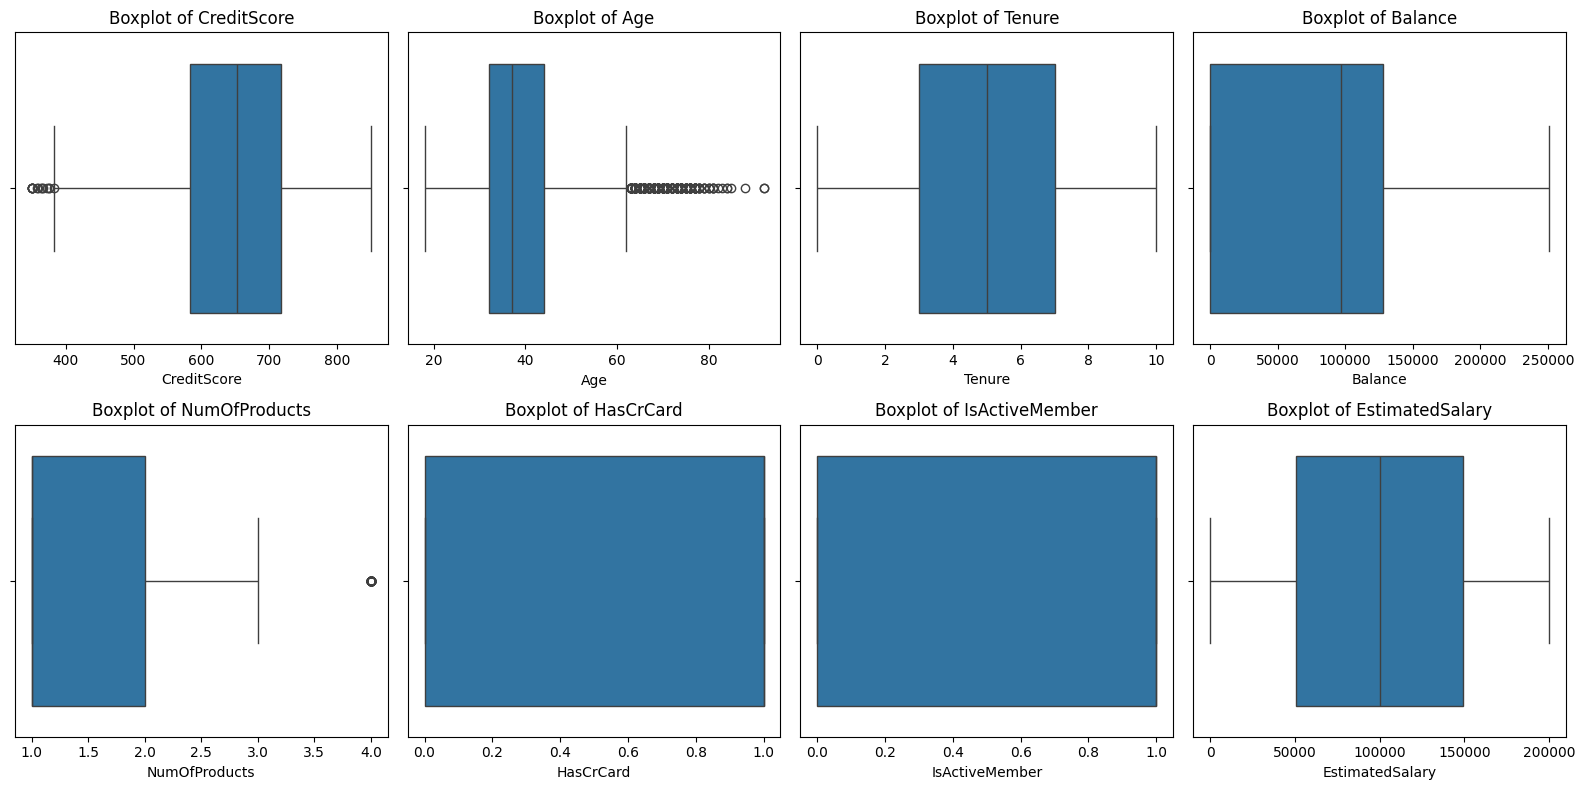

In [ ]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns for 8 features
axes = axes.flatten()  # Flatten to make it easier to iterate through axes

for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=data1[col], ax=axes[i])  
    axes[i].set_title(f'Boxplot of {col}') 


plt.tight_layout()
plt.show()


In [146]:
fig = make_subplots(rows=3, cols=1)

plot1= go.Box(x=data['CreditScore'], name='CreditScore Box plot', boxmean=True) # columns and title
plot2= go.Box(x=data['Age'], name='Age Box plot', boxmean=True) # 
plot3= go.Box(x=data['NumOfProducts'], name='NumberOfProducts Box plot', boxmean=True) # 


fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2,row=2, col=1)
fig.add_trace(plot3,row=3, col=1)


fig.update_layout(height=700, width=1000, title_text="Distribution of Customer Estimated Salary") # height, lenghtg, tittle
fig.show()

## 3.1. Handling outliers

1. for number of product will perfoma a transfomation or cap technique this is becase the outlier which is 4 is close to the max value with is 3
2. same to credit score using the transfomation technique , the values are close to the min credit score and credit score can be one of the factors that are comtributing for customets to churn , most specially hwn the vreits are low, so this feaure is imortant.
3. for age also applied the same approache by using the threshold methos, Percentile threshold . this was bacause the values were too clode to the max value when analysing the box plot


In [147]:
columns_to_transform = ['CreditScore','Age','NumOfProducts'] # columns with outliers

for x in columns_to_transform:
    # Calculate the 5th and 95th percentiles
    lower_limit = np.percentile(data1[x], 5)
    upper_limit = np.percentile(data1[x], 95)
    
    # Cap values at the 5th and 95th percentiles
    data1[x] = np.where(data1[x] < lower_limit, lower_limit, data1[x])
    data1[x] = np.where(data1[x] > upper_limit, upper_limit, data1[x])

# Verify the transformed columns
print(data1)

      CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619.0  42.0       2       0.00            1.0          1   
1           608.0  41.0       1   83807.86            1.0          0   
2           502.0  42.0       8  159660.80            2.0          1   
3           699.0  39.0       1       0.00            2.0          0   
4           812.0  43.0       2  125510.82            1.0          1   
...           ...   ...     ...        ...            ...        ...   
9995        771.0  39.0       5       0.00            2.0          1   
9996        516.0  35.0      10   57369.61            1.0          1   
9997        709.0  36.0       7       0.00            1.0          0   
9998        772.0  42.0       3   75075.31            2.0          1   
9999        792.0  28.0       4  130142.79            1.0          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58  

In [148]:
print("CreditScore - Min:", data1['CreditScore'].min(), "Max:", data1['CreditScore'].max())
print("Age - Min:", data1['Age'].min(), "Max:", data1['Age'].max())
print("Max Credits:", data1['NumOfProducts'].max(), "Mix")

CreditScore - Min: 489.0 Max: 812.0
Age - Min: 25.0 Max: 60.0
Max Credits: 2.0 Mix


In [149]:
# Create subplots for the transformed data
fig = make_subplots(rows=3, cols=1)

plot1 = go.Box(x=data1['CreditScore'], name='Transformed CreditScore Box Plot', boxmean=True)
plot2 = go.Box(x=data1['Age'], name='Transformed Age Box Plot', boxmean=True)
plot3 = go.Box(x=data1['NumOfProducts'], name='Transformed NumOfProducts Box Plot', boxmean=True)

fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2, row=2, col=1)
fig.add_trace(plot3, row=3, col=1)

fig.update_layout(
    height=700,
    width=1000,
    title_text="Box Plots After Transformation",
    showlegend=True
)


fig.show()

In [150]:
data1['Age'].max()


60.0

## 3.2. Scaling

In [151]:
# Standardizing transforms features to have a mean of 0 and a standard deviation of 1. This makes all features comparable, especially when they are measured on different scales, the approached used is standardization
scaler = StandardScaler()
data1[['CreditScore', 'Age', 'NumOfProducts']] = scaler.fit_transform(data1[['CreditScore', 'Age', 'NumOfProducts']])


In [152]:
# cheching the unique geographic values
data2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## 3.3. one hot encoding
- the encoding used here is labelencoder this was because we have nore that 2 categorical values in a feature like geography

In [153]:
label_encoder = LabelEncoder()

data2['Geography_encoded'] = label_encoder.fit_transform(data2['Geography'])
data2['Gender_encoded'] = label_encoder.fit_transform(data2['Gender'])

print(data2)

     Geography  Gender  Geography_encoded  Gender_encoded
0       France  Female                  0               0
1        Spain  Female                  2               0
2       France  Female                  0               0
3       France  Female                  0               0
4        Spain  Female                  2               0
...        ...     ...                ...             ...
9995    France    Male                  0               1
9996    France    Male                  0               1
9997    France  Female                  0               0
9998   Germany    Male                  1               1
9999    France  Female                  0               0

[10000 rows x 4 columns]


In [154]:
data2 = data2.drop(columns=['Geography', 'Gender'])

data2

Geography_encoded  Gender_encoded
0                     0               0
1                     2               0
2                     0               0
3                     0               0
4                     2               0
...                 ...             ...
9995                  0               1
9996                  0               1
9997                  0               0
9998                  1               1
9999                  0               0

[10000 rows x 2 columns]

In [155]:
scaler = StandardScaler()
data2[['Geography_encoded', 'Gender_encoded']] = scaler.fit_transform(data2[['Geography_encoded', 'Gender_encoded']])

print(data2.head())


   Geography_encoded  Gender_encoded
0          -0.901886       -1.095988
1           1.515067       -1.095988
2          -0.901886       -1.095988
3          -0.901886       -1.095988
4           1.515067       -1.095988


In [156]:
data_combined = pd.concat([data1, data2], axis=1)  # Axis 1 means column-wise concatenation

print(data_combined.head())


   CreditScore       Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0    -0.352171  0.353366       2       0.00      -0.983339          1   
1    -0.473647  0.246145       1   83807.86      -0.983339          0   
2    -1.644230  0.353366       8  159660.80       1.016944          1   
3     0.531288  0.031705       1       0.00       1.016944          0   
4     1.779173  0.460586       2  125510.82      -0.983339          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_encoded  Gender_encoded  
0               1        101348.88       1          -0.901886       -1.095988  
1               1        112542.58       0           1.515067       -1.095988  
2               0        113931.57       1          -0.901886       -1.095988  
3               0         93826.63       0          -0.901886       -1.095988  
4               1         79084.10       0           1.515067       -1.095988  


In [157]:
# defining the target column as y
X = data_combined.drop(columns=['Exited'])  # Drop target column
y = data_combined['Exited']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (8000, 10), Test size: (2000, 10)


# 4. Model Selection
The chosen model for this problem will be the Random Forest model. This is because we have a sufficiently large dataset, and our dataset consists of both numerical and categorical variables. Random Forest is a robust model that is well-suited to handle both types of features and can capture complex relationships within the data.


# 5. Model Training
- algorithm : RandomForest

In [158]:
# Initializing the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 6. Model evaluation 
- matrics: Accuracy, precision, recall, f1_score and support

In [159]:
y_pred = rf_model.predict(X_test)

#evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1550   57]
 [ 250  143]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.71      0.36      0.48       393

    accuracy                           0.85      2000
   macro avg       0.79      0.66      0.70      2000
weighted avg       0.83      0.85      0.83      2000



In [160]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8465


In [ ]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance_df)


             Feature  Importance
1                Age    0.250406
7    EstimatedSalary    0.172385
3            Balance    0.159389
0        CreditScore    0.154294
2             Tenure    0.095168
6     IsActiveMember    0.045964
8  Geography_encoded    0.040123
4      NumOfProducts    0.039215
5          HasCrCard    0.022213
9     Gender_encoded    0.020841


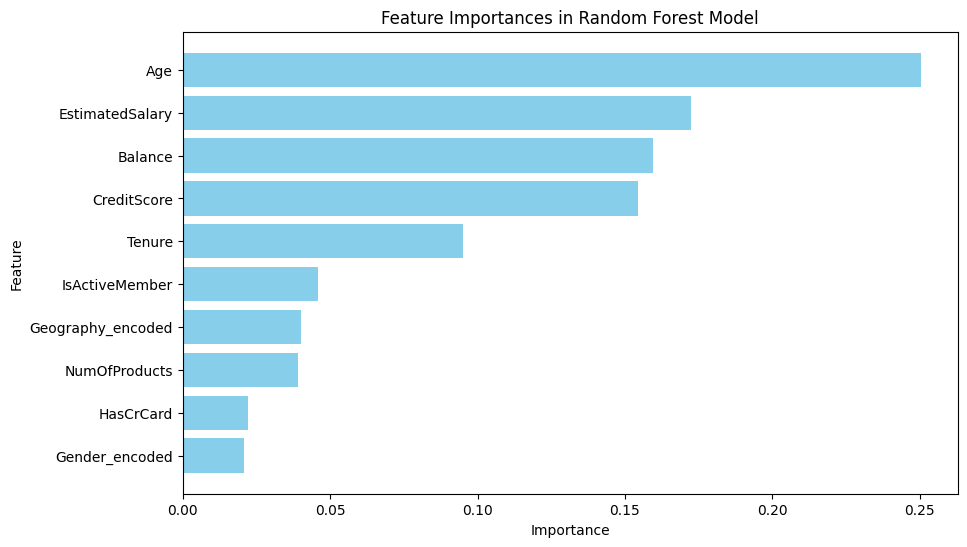

In [162]:
# Ploting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()


 Important features highlight which variables have the most influence on the target variable, providing insight into the model's reasoning. In this analysis, the feature with the highest importance value indicates that age is a significant factor likely to affect the outcome — in this case, the likelihood of customers leaving the bank.

# 7. Model explainability and Interpritation
- Technique Shap and Lime

In [163]:
true_labels = y_test  
predictions = rf_model.predict(X_test)  


cm = confusion_matrix(true_labels, predictions)


fig = px.imshow(cm, 
                labels={'x': 'Actual', 'y': 'Predicted'}, 
                x=['Not Churn', 'Churn'], 
                y=['Predicted Not Churn', 'Predicted Churn'], 
                color_continuous_scale='Fall')


fig.update_layout(title='Random Forest Model Confusion Matrix')


fig.show()


In [164]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  
    feature_names=X_train.columns,  
    class_names=['Not Churn', 'Churn'], 
    mode='classification'  
)


sample = X_test.iloc[0].values.reshape(1, -1)


explanation = explainer.explain_instance(
    data_row=sample.flatten(),
    predict_fn=rf_model.predict_proba  
)


explanation.show_in_notebook(show_table=True)


C:\Users\ntabi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



- using shap technique

Feature Contribution: SHAP values quantify how much each feature influences the prediction of a machine learning model, providing both magnitude and direction (positive or negative impact).

- Suppose a model predicts house prices, and the prediction for a specific house is $300,000. SHAP values might show:

Location: +$50,000
Size: +$80,000
Age: -$30,000
Overall: $300,000 (matches the prediction)

- Credits Low (300)	+0.30	A low credit score indicates higher financial risk.
- Age	Young (25)	+0.20	Younger customers are more likely to switch banks.
- Tenure	Short (2 years)	+0.15	Short tenure suggests weaker loyalty to the bank.
- Active	Inactive	+0.15	Inactive accounts are more likely to churn.

In [ ]:
def rf_predict_wrapper(data):
    return rf_model.predict(data)

masker = shap.maskers.Independent(X_train)

explainer = shap.ExactExplainer(rf_predict_wrapper, masker)

shap_values = explainer(X_train)


In [ ]:
masker = shap.maskers.Independent(X_train)  


In [ ]:
explainer = shap.ExactExplainer(rf_predict_wrapper, masker)  


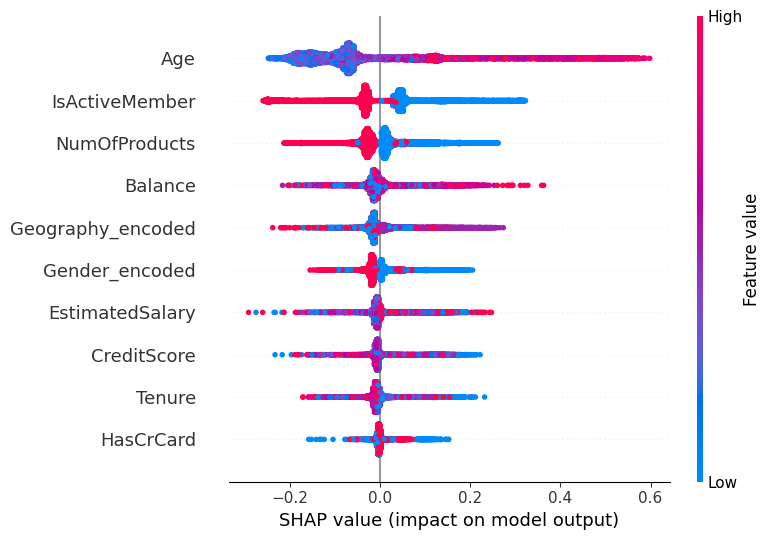

In [ ]:
shap.summary_plot(shap_values, X_train) 
# Visualization of all the features, with higher values represented in red or red colors. The x-axis shows the SHAP values, helping us identify which features have the largest positive or negative SHAP values.

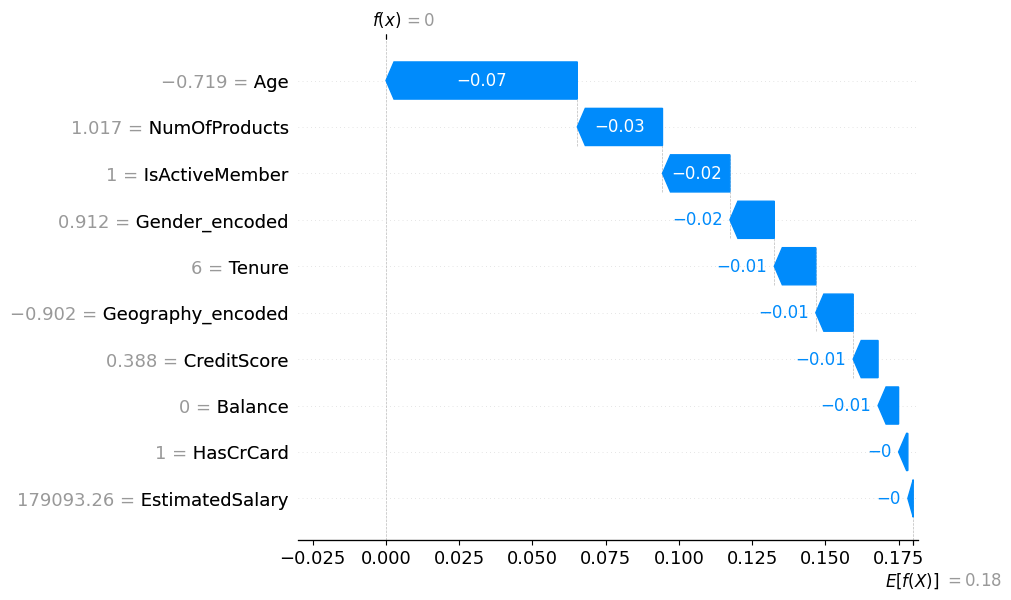

In [ ]:
shap.plots.waterfall(shap_values[0])

1. Age (SHAP value: -0.719):

Effect on Model's Prediction: The SHAP value for Age is negative (-0.07), indicating that Age contributes to a decrease in the model's prediction. This means that older customers are less likely to churn, as the feature is moving the prediction lower (towards 0, indicating less likelihood of churn).

Interpretation: The negative SHAP value suggests that as a customer’s age increases, the model predicts a lower probability of churn (they are more likely to stay with the bank).


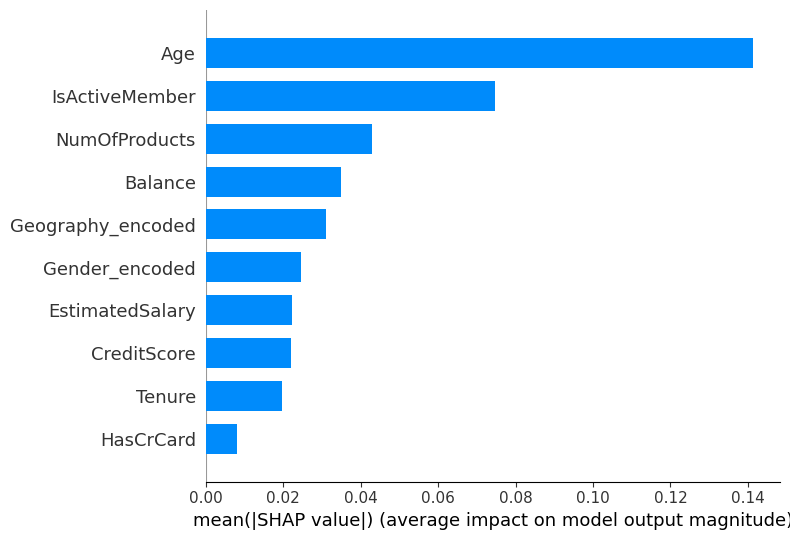

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar") 

Age:

Impact: Age is the feature with the highest mean SHAP value (around 0.14), indicating that it has the strongest effect on the prediction. This means that Age plays a crucial role in determining whether a customer is likely to churn or not.
Positive Impact: A higher Age likely indicates a lower probability of churn (since Age has a positive effect here, based on the SHAP values).

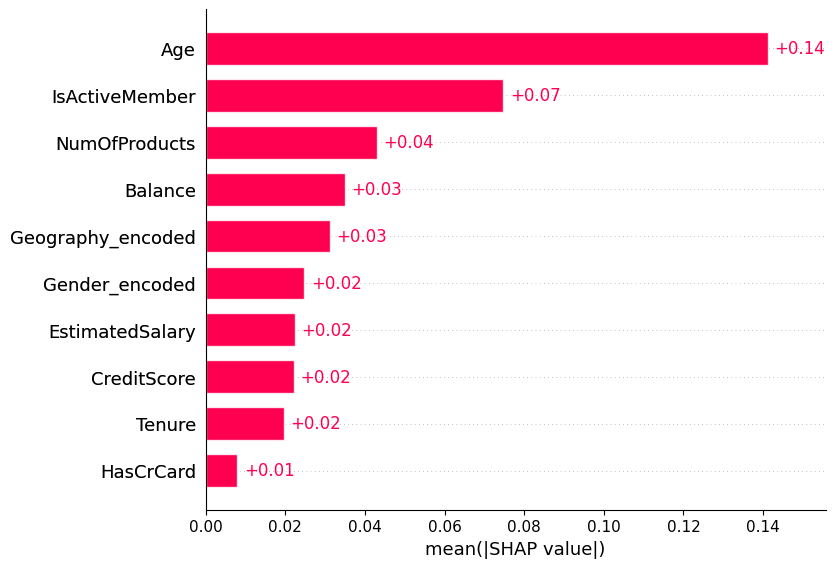

In [ ]:
shap.plots.bar(shap_values)
# this gives us the absolute mean for that feature , as we can see the age has the large mean value in contributing to the model

In [ ]:
shap.plots.force(shap_values[0:100])
#

In [ ]:
# first instance in the dataset
shap.force_plot(shap_values[0]) 

# This provides us with insights into how each feature has contributed to the final prediction

In [ ]:
shap.force_plot(shap_values[1]) 


In [ ]:
shap.force_plot(shap_values[2])  


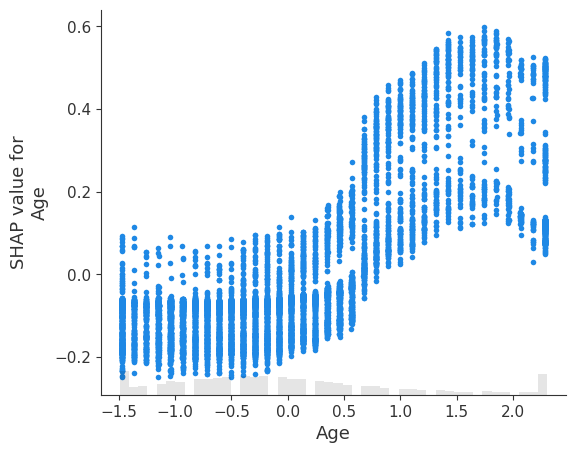

In [ ]:
# depedency plot
shap.plots.scatter(shap_values[:,"Age"])
# as age increase the shap mean values increase which simples ean that as people get older are not most liket to leave the bank

In [ ]:
shap.plots.scatter(shap_values[:,"CreditScore"])
